# Обучение модели FasterRCNN и YOLOv5 для детекции Helmet

ФИО: Усцов Артем Алексеевич

In [10]:
from IPython.display import Image

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
import torchvision
import torch
# import PIL
# from PIL import Image
import json

import matplotlib
%matplotlib inline

In [11]:
def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

def save_to_json(filename, data):
    with open(filename, 'w') as f:
        return json.dump(data, f)
    
def load_from_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

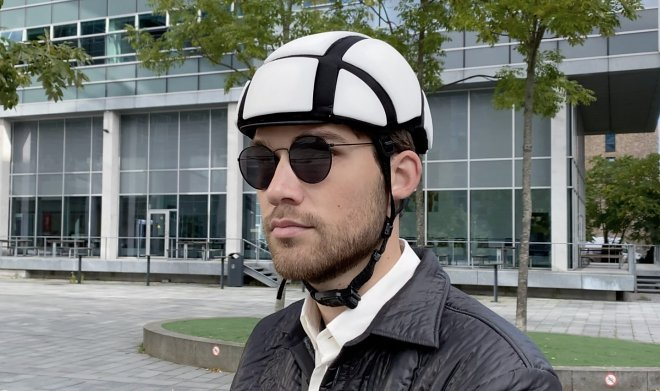

In [12]:
# Пример изображение с детектируемым объектом
Image(filename='helmet.jpg')

* Используем dataset LVIS [link](https://www.lvisdataset.org/)  
* [Репозиторий YOLOv5](https://github.com/ultralytics/yolov5)  
* [Конфигурационный файл](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml)

## Обучение модели FasterRCNN

In [13]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained=True, progress=True,
    num_classes=91, pretrained_backbone=True,
)

/Users/a.ustsov/technopark/DL_Homeworks/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/a.ustsov/technopark/DL_Homeworks/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/a.ustsov/technopark/DL_Homeworks/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and will be removed in 0.15, please use 'weights_backbone' instead.
  warnings.warn(
/Users/a.ustsov/technopark/D

  0%|          | 0.00/160M [00:00<?, ?B/s]

In [21]:
# !pip install lvis
# !pip install pycocotools
import lvis

In [23]:
dir(lvis)

['LVIS',
 'LVISEval',
 'LVISResults',
 'LVISVis',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'colormap',
 'eval',
 'logging',
 'lvis',
 'results',
 'vis']

In [25]:
lvis.LVIS()

TypeError: LVIS.__init__() missing 1 required positional argument: 'annotation_path'